In [24]:
import hdbscan
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import load_npz
clusterer = hdbscan.HDBSCAN(min_cluster_size=20, metric='euclidean')

# load sparse matrix

In [25]:
X = load_npz("../data_preprocessing/X_tfidf_sparse.npz")

# 降維

In [26]:
import hdbscan
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=30)
X_reduced = svd.fit_transform(X.T)  # 注意轉置 → 每個 row 是一部電影


# HDBSCAN

In [27]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=20)
labels = clusterer.fit_predict(X_reduced)  # shape: (num_movies,)

/home/yuu/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/yuu/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [30]:
labels.shape

(496540,)

# draw HDBSCAN result

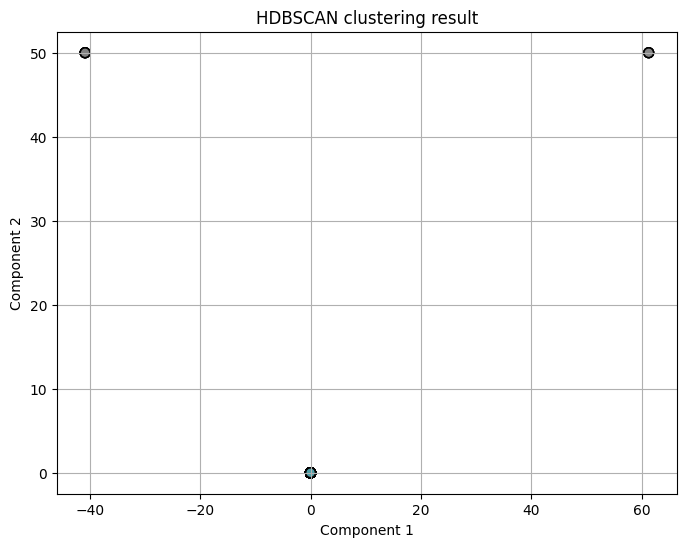

In [28]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X_2d = PCA(n_components=2).fit_transform(X_reduced)

# 畫圖
plt.figure(figsize=(8, 6))
palette = plt.get_cmap("tab10")
colors = [palette(label) if label >= 0 else (0.5, 0.5, 0.5, 0.5) for label in labels]

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=colors, s=50, edgecolor='k')
plt.title("HDBSCAN clustering result")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

# 將原始dataset依照cluster進行分割

In [ ]:
movie_id_to_cluster = {movie_id: cluster_label for movie_id, cluster_label in zip(movie_ids, labels)}

In [ ]:
from collections import defaultdict

cluster_to_movies = defaultdict(list)
for m, c in movie_id_to_cluster.items():
    if c != -1:  # -1 通常是 noise
        cluster_to_movies[c].append(m)


# 進行 LDP_RM

In [ ]:
import sys
import os
sys.path.append("../LDP_RM")
from ldp_rm import LDP_RM


ModuleNotFoundError: No module named 'data_rm'

In [ ]:
for c, movies in cluster_to_movies.items():
    data_c = Data.filter_by_movies(movie_list=movies)
    ldp_rm = LDP_RM(data_c, epsilon=4.0, top_k=64, top_ks=3600, top_kc=32, submat=4) 
    result_fre_dict, result_conf_dict, _ = ldp_rm.find_itemset_svd(...)
